In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

In [131]:
data = pd.read_csv("/content/Amazon Sale Report.csv")

In [132]:
df = data.copy()

In [133]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# Data reduction

In [135]:
df2 = df[['Date',"Category",'Size',"Qty","Amount","B2B"]]

In [136]:
df2.head()

,Date,Category,Size,Qty,Amount,B2B
0,04-30-22,T-shirt,S,0,647.62,False
1,04-30-22,Shirt,3XL,1,406.00,False
2,04-30-22,Shirt,XL,1,329.00,True
3,04-30-22,Blazzer,L,0,753.33,False
4,04-30-22,Trousers,3XL,1,574.00,False


# Handling Null values

In [137]:
for feature in df2.columns:
  print(feature,":",df2[feature].isnull().sum())

Date : 0
Category : 0
Size : 0
Qty : 0
Amount : 7800
B2B : 0


In [138]:
df2["Amount"]= df2["Amount"].fillna(df2["Amount"].median())

<ipython-input-138-82a8883d3848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Amount"]= df2["Amount"].fillna(df2["Amount"].median())


In [139]:
for feature in df2.columns:
  print(feature,":",df2[feature].isnull().sum())

Date : 0
Category : 0
Size : 0
Qty : 0
Amount : 0
B2B : 0


# Handling Outliers

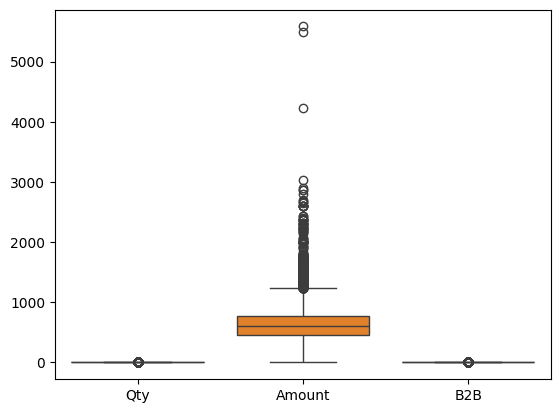

In [140]:
plt.figure.figsize=(10,10)
sns.boxplot(df2)
plt.show()

In [141]:
q1 = df2["Amount"].quantile(0.5)
q3 = df2["Amount"].quantile(0.75)
IQR = q3-q1

In [142]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [143]:
df2["Amount"] = np.where(df2["Amount"] > upper_bound,upper_bound,df2["Amount"])
df2["Amount"] = np.where(df2["Amount"] < lower_bound,lower_bound,df2["Amount"])

<ipython-input-143-4ada21f13feb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Amount"] = np.where(df2["Amount"] > upper_bound,upper_bound,df2["Amount"])
<ipython-input-143-4ada21f13feb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Amount"] = np.where(df2["Amount"] < lower_bound,lower_bound,df2["Amount"])


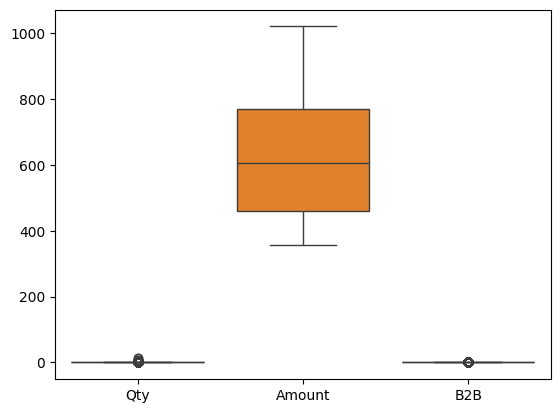

In [144]:
plt.figure.figsize=(10,10)
sns.boxplot(df2)
plt.show()

# Feature Encoding

In [145]:
categorical_features = [feature for feature in df2.columns if df2[feature].dtypes == "O"]

In [146]:
categorical_features

['Date', 'Category', 'Size']

In [147]:
df2["Date"] = pd.to_datetime(df2["Date"])

<ipython-input-147-6f776e857dde>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["Date"] = pd.to_datetime(df2["Date"])
<ipython-input-147-6f776e857dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"] = pd.to_datetime(df2["Date"])


In [148]:
from sklearn.preprocessing import OrdinalEncoder

In [149]:
encoder = OrdinalEncoder(categories=[sorted(df2.Size.unique())])

In [150]:
df2['Size_encoded'] = encoder.fit_transform(df2[['Size']]).astype(int)


<ipython-input-150-6c98a122f645>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Size_encoded'] = encoder.fit_transform(df2[['Size']]).astype(int)


In [151]:
df2.head()

,Date,Category,Size,Qty,Amount,B2B,Size_encoded
0,2022-04-30,T-shirt,S,0,647.62,False,7
1,2022-04-30,Shirt,3XL,1,406.00,False,0
2,2022-04-30,Shirt,XL,1,356.00,True,8
3,2022-04-30,Blazzer,L,0,753.33,False,5
4,2022-04-30,Trousers,3XL,1,574.00,False,0


In [152]:
encoder = OrdinalEncoder(categories=[sorted(df2.Category.unique())])

In [153]:
df2["Category_encoded"] = encoder.fit_transform(df2[["Category"]]).astype(int)

<ipython-input-153-54d06d2e7bca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Category_encoded"] = encoder.fit_transform(df2[["Category"]]).astype(int)


In [154]:
df2.head()

,Date,Category,Size,Qty,Amount,B2B,Size_encoded,Category_encoded
0,2022-04-30,T-shirt,S,0,647.62,False,7,5
1,2022-04-30,Shirt,3XL,1,406.00,False,0,2
2,2022-04-30,Shirt,XL,1,356.00,True,8,2
3,2022-04-30,Blazzer,L,0,753.33,False,5,0
4,2022-04-30,Trousers,3XL,1,574.00,False,0,6


In [155]:
df2.to_csv("Amazon_sale_report_preprocessed.csv",index=False)